In [1]:
# PROBLEM STATEMENT:
# In this project, I want to understand which factors affecting the pricing of cars.
# Which variables are major effect in predicting the price of a car?
# How well those variables describe the price of a car?

In [3]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

#Matplotlib library is a comprehensive library for creating static, animated, and interactive visualizations in Python.
#Most of the Matplotlib utilities lies under the pyplot submodule with alias plt

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib import colors

# Get The Data

In [2]:
# Read in the data

url = "/Users/yasemincingoz/Desktop/UCSC/PRACTICES/Python_Project2/CarPrice_Assignment.csv"
df = pd.read_csv(url)

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Check The Data

In [44]:
# Missing value
# Let's see if there is any missing values

# verbose=True ensures that the method returns information for all of the columns
# memory_usage=True ensures that the memory usage inf. is accurate

df.info(verbose = True, memory_usage = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [45]:
# Loop over each column, and use the isnull() method in Pandas to calculate the fraction of missing values

for col in df.columns:
    missing_value = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, missing_value))
    
# There is no missing value.

car_ID - 0.0%
symboling - 0.0%
CarName - 0.0%
fueltype - 0.0%
aspiration - 0.0%
doornumber - 0.0%
carbody - 0.0%
drivewheel - 0.0%
enginelocation - 0.0%
wheelbase - 0.0%
carlength - 0.0%
carwidth - 0.0%
carheight - 0.0%
curbweight - 0.0%
enginetype - 0.0%
cylindernumber - 0.0%
enginesize - 0.0%
fuelsystem - 0.0%
boreratio - 0.0%
stroke - 0.0%
compressionratio - 0.0%
horsepower - 0.0%
peakrpm - 0.0%
citympg - 0.0%
highwaympg - 0.0%
price - 0.0%


In [9]:
# Check if there are any duplicated values
# There is no duplicated value.

df[df.duplicated(keep = False)]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# Understand The Data

In [11]:
df.shape

(205, 26)

In [28]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
#Data types of columns

df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Data Cleaning and Preparation

In [29]:
df.columns = df.columns.str.replace(" ", "")
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:
# Split the name of company from CarName column
# Drop the CarName column, insert the CompanyName column

CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])

df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [64]:
df.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# There are some spelling errors in the CompanyName column.
# alfa-romero = alfa-romeo
# maxda = mazda
# Nissan = nissan
# porcshce = porsche
# vokswagen = volkswagen = vw

In [65]:
# Make CompanyName Column lower case

df.CompanyName = df.CompanyName.str.lower()

def replace_name(a,b):
    df.CompanyName.replace(a,b, inplace=True)

replace_name('alfa-romero','alfa-romeo')
replace_name('maxda','mazda')
replace_name('Nissan','nissan')
replace_name('porcshce','porsche') 
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df.CompanyName.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo'], dtype=object)

# Visualizing the Data

In [5]:
# CATEGORICAL COLUMNS

categorical_col = df.select_dtypes(include=['object']).columns
categorical_col

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [6]:
# NUMERICAL COLUMNS

numerical_col = df.select_dtypes(exclude=['object']).columns
numerical_col

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Visualizing Categorical Data

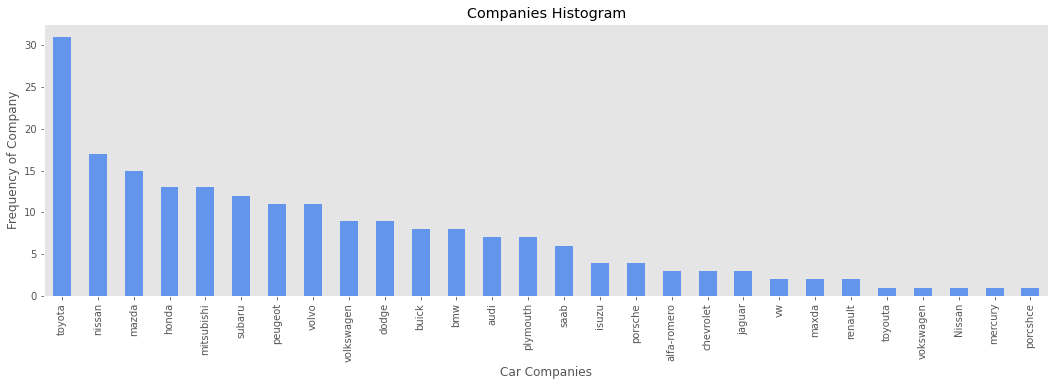

In [15]:
plt.figure(figsize= (18,5))

plt1 = df.CompanyName.value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car Companies', ylabel = 'Frequency of Company')
plt.grid(False)
plt.show()

In [11]:
# Toyota is the favorite car company.

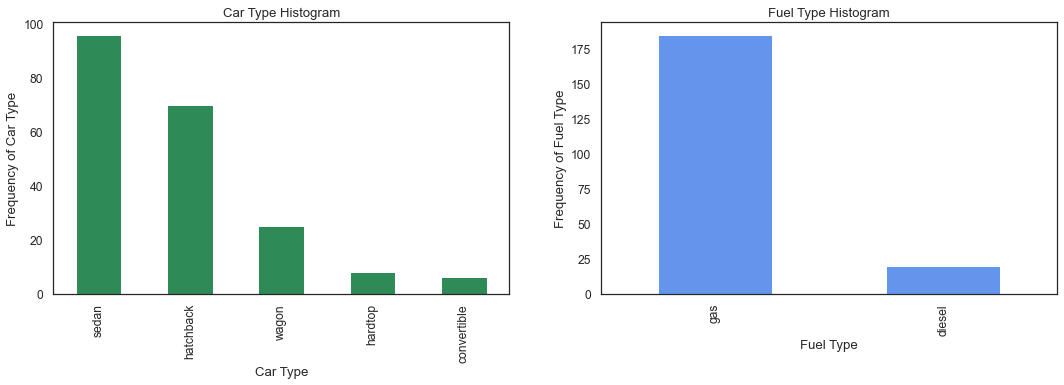

In [75]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt2 = df.carbody.value_counts().plot(kind='bar', color ='seagreen')
plt.title('Car Type Histogram')
plt2.set(xlabel = 'Car Type', ylabel = 'Frequency of Car Type')
plt.grid(False)


plt.subplot(1,2,2)
plt3 = df.fueltype.value_counts().plot(kind='bar', color='cornflowerblue')
plt.title('Fuel Type Histogram')
plt3.set(xlabel = 'Fuel Type', ylabel = 'Frequency of Fuel Type')
plt.grid(False)

plt.show()

In [ ]:
# Sedan is the most preferred car type.
# Gas fueledis obviously more common than dissel.

<Figure size 1584x432 with 0 Axes>

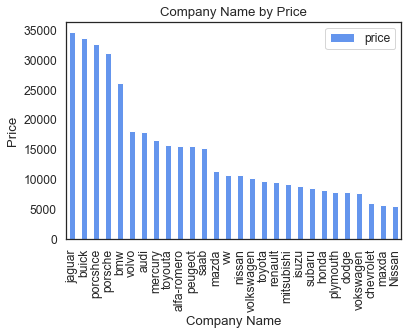

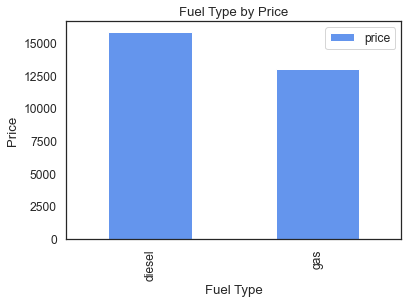

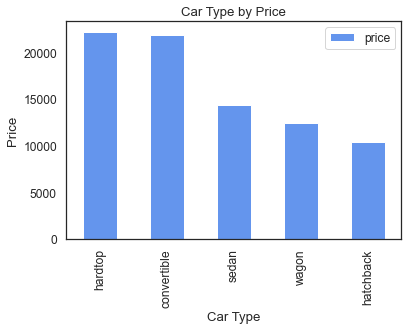

In [79]:
plt.figure(figsize=(22,6))

df1 = pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending=False))
df1.plot.bar(color='cornflowerblue')
plt.title('Company Name by Price')
plt.xlabel('Company Name')
plt.ylabel('Price')
plt.show()


df1 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df1.plot.bar(color='cornflowerblue')
plt.title('Fuel Type by Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


df1 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df1.plot.bar(color='cornflowerblue')
plt.title('Car Type by Price')
plt.xlabel('Car Type')
plt.ylabel('Price')
plt.show()

In [ ]:
# Jaguar has the highest average price. Buick and Porsche are following it.
# Dissel has higher average price than gas.
# Hardtop and convertible car types have higher average price than the others.

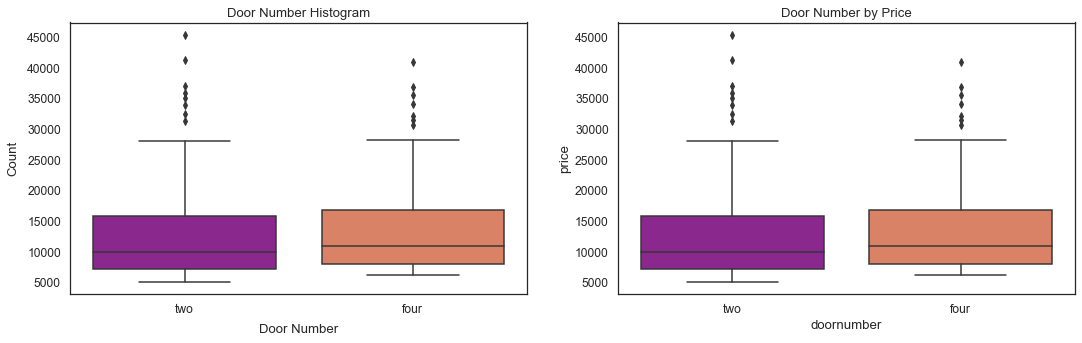

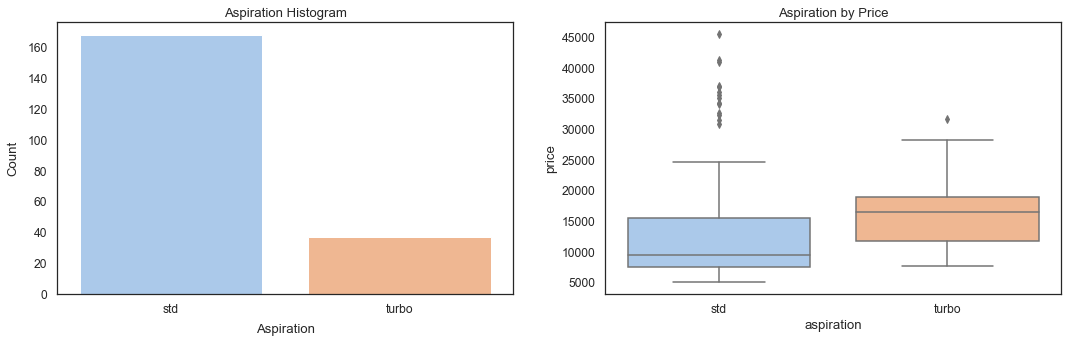

In [11]:
plt.figure(figsize=(18,5))
sns.set(font_scale=1.1)
sns.set_style('white')

plt.subplot(1,2,1)
#df['doornumber'].value_counts().plot(kind='bar', rot=0, color='')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))
plt.title("Door Number Histogram", y=1)
plt.xlabel("Door Number", labelpad=8)
plt.ylabel("Count", labelpad=8);


plt.subplot(1,2,2)
plt.title('Door Number by Price')
plt.xlabel('Door Number')
plt.ylabel('Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

plt.show()


plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
#df['aspiration'].value_counts().plot(kind='bar', rot=0)
sns.countplot(x=df.aspiration, palette=("pastel"))
plt.title("Aspiration Histogram", y=1)
plt.xlabel("Aspiration", labelpad=8)
plt.ylabel("Count", labelpad=8);

plt.subplot(1,2,2)
plt.title('Aspiration by Price')
plt.xlabel('Aspiration')
plt.ylabel('Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=('pastel'))

plt.show()

In [ ]:
# Door number is not effective on price. There is no significant difference between the categories.
# Aspiration with turbo has higher price than the std.(std also has some high values outside the whiskers)

Text(0, 0.5, 'Engine Type by Price')

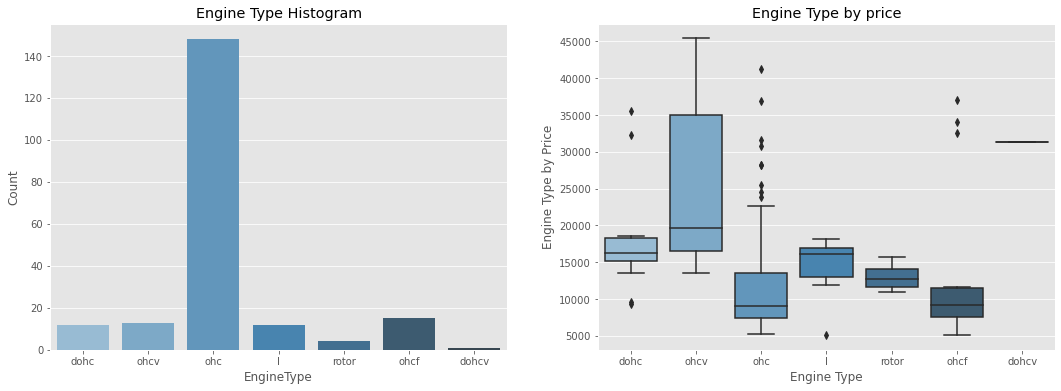

In [4]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x=df.enginetype, palette=("Blues_d"))
plt.title("Engine Type Histogram")
plt.xlabel("EngineType")
plt.ylabel("Count")


plt.subplot(1,2,2)
sns.boxplot(x=df.enginetype, y=df.price, palette=("Blues_d"))
plt.title("Engine Type by price")
plt.xlabel("Engine Type")
plt.ylabel("Engine Type by Price")

Text(0, 0.5, 'Price')

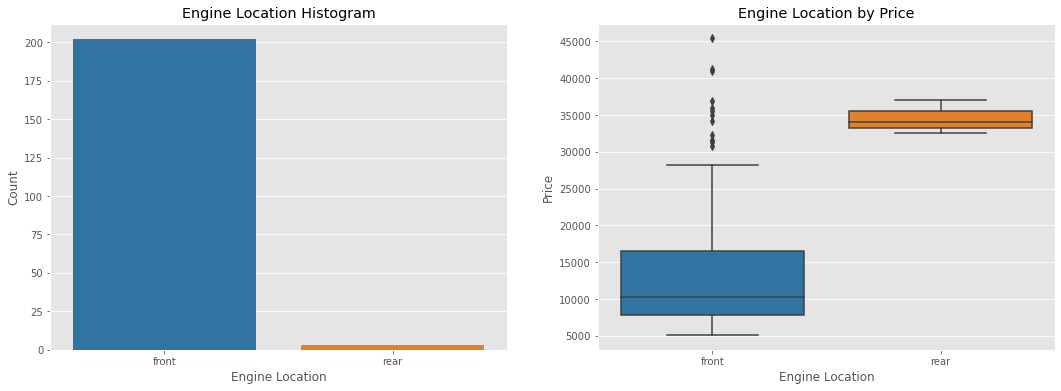

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x=df.enginelocation, palette=("tab10"))
plt.title("Engine Location Histogram")
plt.xlabel("Engine Location")
plt.ylabel("Count")


plt.subplot(1,2,2)
sns.boxplot(x=df.enginelocation, y=df.price, palette=("tab10"))
plt.title("Engine Location by Price")
plt.xlabel("Engine Location")
plt.ylabel("Price")


In [ ]:
# Small amount of cars have rear engine.

Text(0, 0.5, 'Price')

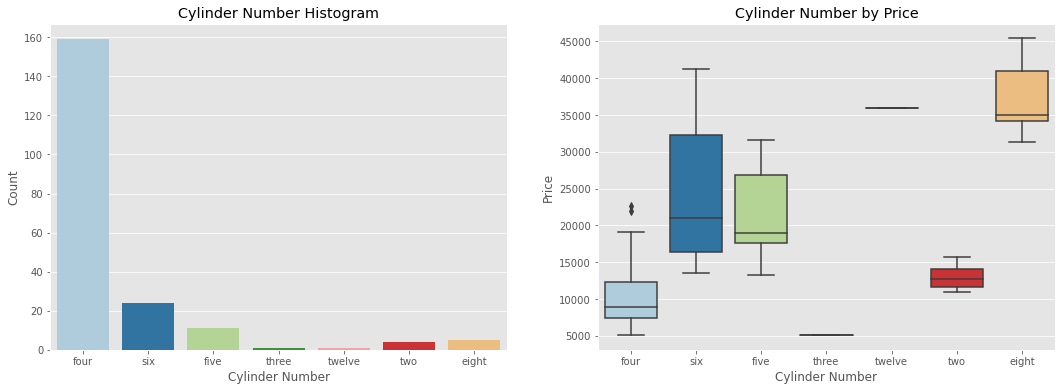

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.countplot(x=df.cylindernumber, palette=("Paired"))
plt.title("Cylinder Number Histogram")
plt.xlabel("Cylinder Number")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.boxplot(x=df.cylindernumber, y=df.price, palette=("Paired"))
plt.title("Cylinder Number by Price")
plt.xlabel("Cylinder Number")
plt.ylabel("Price")

# Visualizing Numerical Data

[Text(0.5, 1.0, 'Distribution of the Price')]

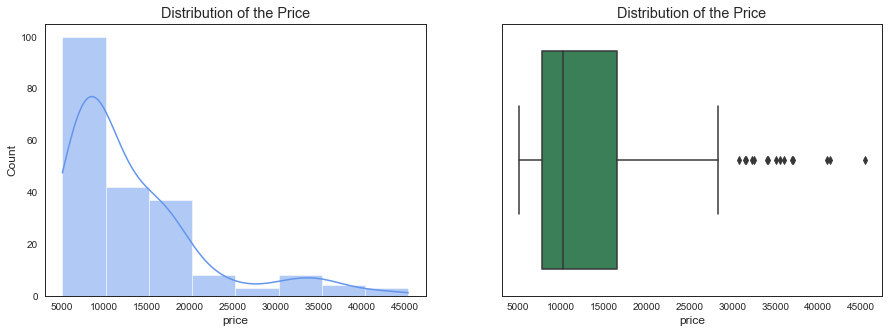

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plt.grid(False)

sns.set_style('white')
sns.histplot(ax=axes[0],data=df, x='price', color='cornflowerblue', kde = True, bins = 8).set(title = 'Distribution of the Price')
sns.boxplot(ax=axes[1],data=df, x='price', color='seagreen').set(title = 'Distribution of the Price')

In [18]:
df.price.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
# The price seemed to be right-skewed. It means that the most prices are below the 15000.
# The data points are spread out from the mean. 85% of the prices are below the 18,500 , and the remaining 15% are between 18,500 ang 45,400.

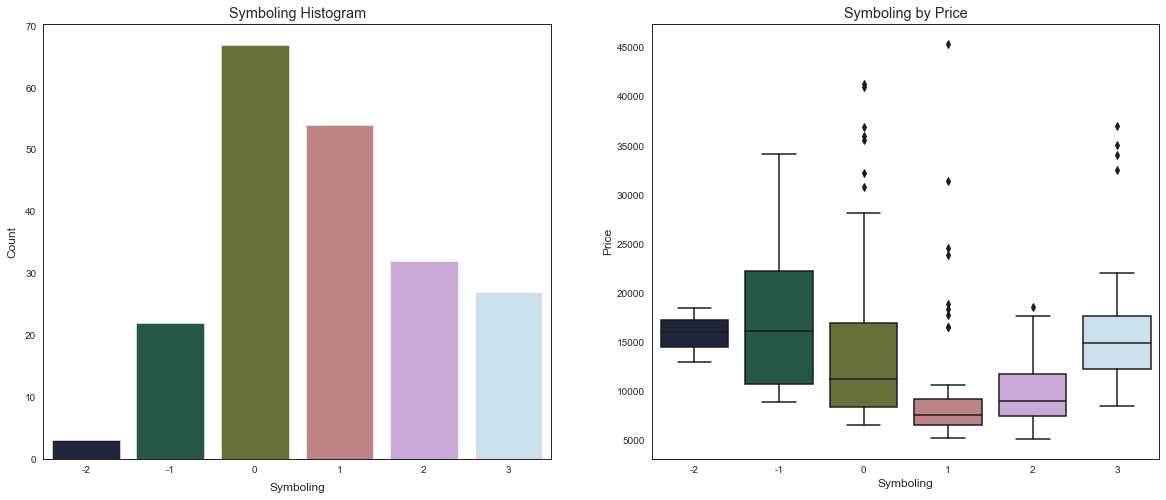

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.countplot(x=df.symboling, palette=("cubehelix"))
plt.title("Symboling Histogram", y=1)
plt.xlabel("Symboling", labelpad=8)
plt.ylabel("Count", labelpad=8);


plt.subplot(1,2,2)
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))
plt.title('Symboling by Price')
plt.xlabel('Symboling')
plt.ylabel('Price')

plt.show()


In [ ]:
# 0 and 1 values have highest number of rows.(most sold)
# There is a dip in price at symboling 1.

[Text(0.5, 1.0, 'Car Width vs Price')]

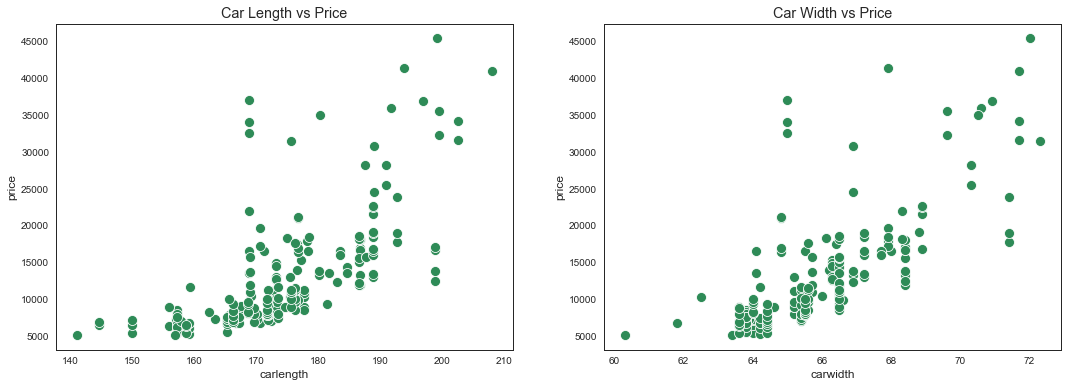

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
plt.grid(False)
sns.set_style('white')

sns.scatterplot(ax=axes[0],data=df, x='carlength', y='price', color='olivedrab', s=100).set(title = 'Car Length vs Price')
sns.scatterplot(ax=axes[1],data=df, x='carwidth', y='price', color='olivedrab', s=100).set(title = 'Car Width vs Price')

[Text(0.5, 1.0, 'CurbWeight vs Price')]

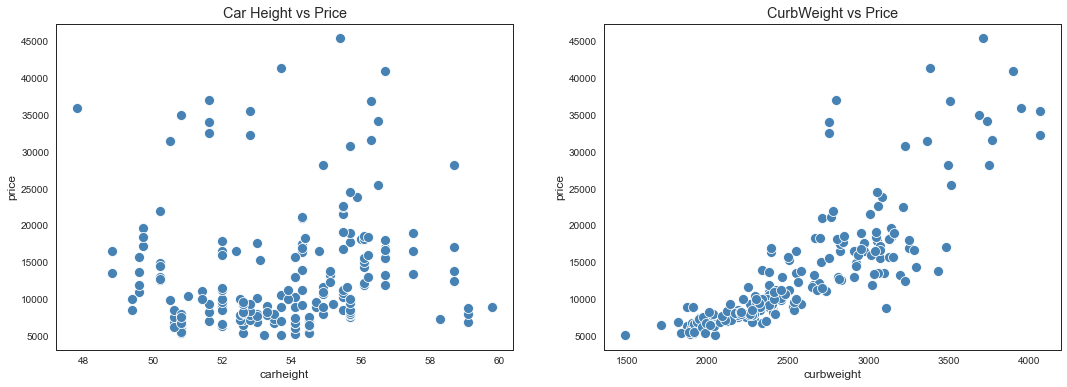

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
plt.grid(False)
sns.set_style('white')

sns.scatterplot(ax=axes[0],data=df, x='carheight', y='price', color='steelblue', s=100).set(title = 'Car Height vs Price')
sns.scatterplot(ax=axes[1],data=df, x='curbweight', y='price', color='steelblue', s=100).set(title = 'CurbWeight vs Price')

In [ ]:
# CarLength, CarWidth, CurbWeight looks like have positive correlation with price but CarHeight doesn't show any spesific trend.

[Text(0.5, 1.0, 'Boreratio vs Price')]

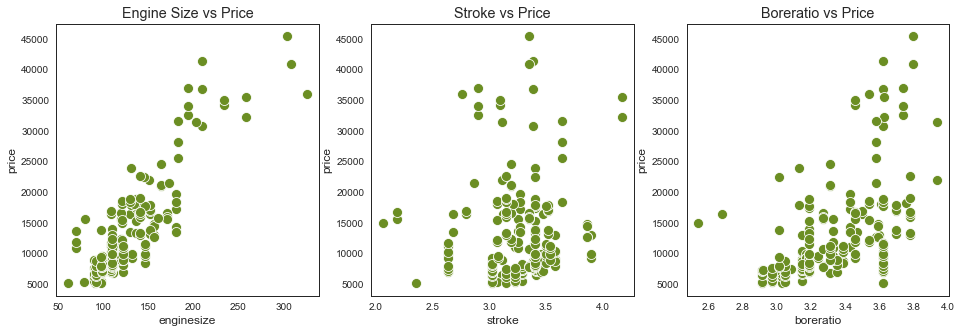

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
plt.grid(False)
sns.set_style('white')

sns.scatterplot(ax=axes[0],data=df, x='enginesize', y='price', color='olivedrab', s=100).set(title = 'Engine Size vs Price')
sns.scatterplot(ax=axes[1],data=df, x='stroke', y='price', color='olivedrab', s=100).set(title = 'Stroke vs Price')
sns.scatterplot(ax=axes[2],data=df, x='boreratio', y='price', color='olivedrab', s=100).set(title = 'Boreratio vs Price')

[Text(0.5, 1.0, 'Peakrpm vs Price')]

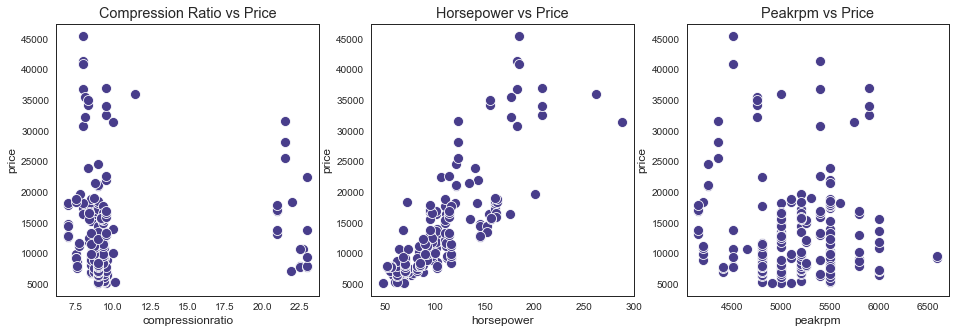

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
plt.grid(False)
sns.set_style('white')

sns.scatterplot(ax=axes[0],data=df, x='compressionratio', y='price', color='darkslateblue', s=100).set(title = 'Compression Ratio vs Price')
sns.scatterplot(ax=axes[1],data=df, x='horsepower', y='price', color='darkslateblue', s=100).set(title = 'Horsepower vs Price')
sns.scatterplot(ax=axes[2],data=df, x='peakrpm', y='price', color='darkslateblue', s=100).set(title = 'Peakrpm vs Price')

[Text(0.5, 1.0, 'Highwaympg vs Price')]

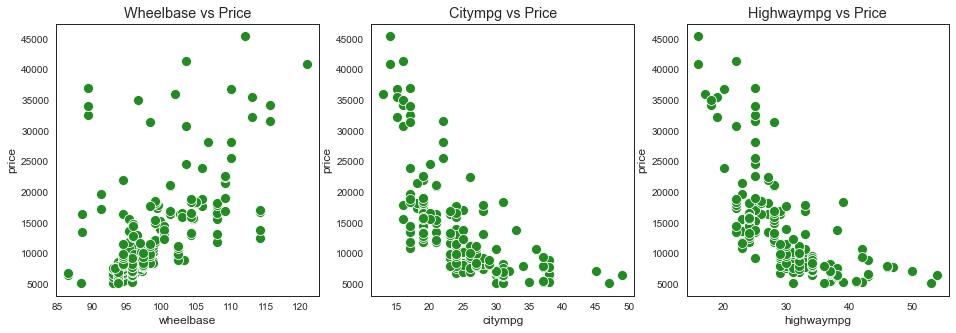

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16,5))
plt.grid(False)
sns.set_style('white')

sns.scatterplot(ax=axes[0],data=df, x='wheelbase', y='price', color='forestgreen', s=100).set(title = 'Wheelbase vs Price')
sns.scatterplot(ax=axes[1],data=df, x='citympg', y='price', color='forestgreen', s=100).set(title = 'Citympg vs Price')
sns.scatterplot(ax=axes[2],data=df, x='highwaympg', y='price', color='forestgreen', s=100).set(title = 'Highwaympg vs Price')

# Correlation

In [9]:
#Pandas corr() method

df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


<AxesSubplot:>

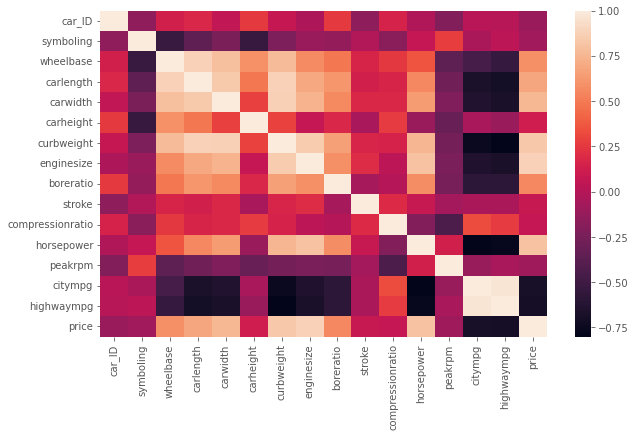

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_col].corr())

In [ ]:
# Wheelbase has high positive correlation with carlength,carwidth and curbweight.
# Carlength has high postive correlation with curbweight and carwidth.
# Carlength has negative correlation with highwaympg and citympg.
# Enginesize has high positive correlation with horsepower and curbweight.
# Curbweight has high positive correlation with engine size and horse power, negative correlation with highwaympg
# Horsepower has negative correlation with citympg and highwaympg

In [10]:
df.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
wheelbase,0.577816
boreratio,0.553173
carheight,0.119336
stroke,0.079443


<AxesSubplot:>

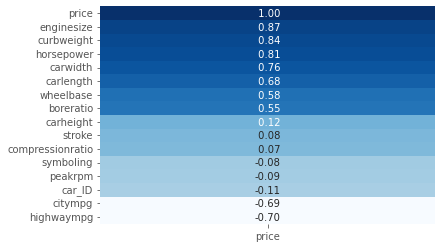

In [4]:
# High correlation between price and enginesize, curbweight, horsepower. Espically between price and enginesize.

# To create a heatmap for the correlation data, use Seaborn heatmap() method
# Created condense heatmap

sns.heatmap(data=df.corr()[['price']].sort_values(by='price', ascending=False),
            annot = True, cmap='Blues', cbar=False, fmt = f' .2f')


In [ ]:
# Creating simple linear regression model that can be used to predict the price of the car
# Scikit-learn function and methods for working with a linear regression model.
# Use train_test_split() function to split a dataset into a training and test dataset

In [16]:
# import sklearn's Linear Regression class
# import sklearn's train_test_split() function

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
# Split the data into training and test datasets

x_train, x_test, y_train, y_test = train_test_split(
    df[['enginesize']], df[['price']],
    test_size = 0.20, random_state = 20)

In [18]:
# Create the model from training datasets

linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

LinearRegression()

In [23]:
# Score the model with the test dataset

linearModel.score(x_test, y_test)

0.7063964117029844

In [24]:
# Score the model with training dataset

linearModel.score(x_train, y_train)

0.766524123801206

In [20]:
# Use the model with the test dataset

y_predicted = linearModel.predict(x_test)
y_predicted

array([[14905.92068578],
       [ 7164.38761294],
       [ 7500.97600741],
       [26181.63190057],
       [ 7500.97600741],
       [ 8342.44699359],
       [ 7332.68181017],
       [10193.68316318],
       [12213.21353001],
       [12381.50772725],
       [ 7164.38761294],
       [ 8510.74119082],
       [19618.15820838],
       [ 8342.44699359],
       [10193.68316318],
       [ 7164.38761294],
       [13896.15550237],
       [ 8342.44699359],
       [12549.80192448],
       [15747.39167196],
       [12549.80192448],
       [ 7500.97600741],
       [22815.74795586],
       [22479.15956139],
       [14569.33229131],
       [12044.91933277],
       [ 8510.74119082],
       [10193.68316318],
       [20796.21758903],
       [ 7500.97600741],
       [12549.80192448],
       [ 7500.97600741],
       [ 8342.44699359],
       [10193.68316318],
       [10530.27155765],
       [10361.97736042],
       [12549.80192448],
       [22479.15956139],
       [ 8510.74119082],
       [12549.80192448],


In [25]:
# Create a DataFrame for the actual and predicted prices

# Step 1: Create a DataFrame for the price predictions

predicted = pd.DataFrame(y_predicted, columns = ['predictedPrice'])

In [26]:
# Step 2: Combine the test data and predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                          y_test.reset_index(drop=True)])

In [28]:
combined[['enginesize', 'price', 'predictedPrice']].head()

,enginesize,price,predictedPrice
0,136,15250.0,14905.920686
1,90,8916.5,7164.387613
2,92,8778.0,7500.976007
3,203,31400.5,26181.631901
4,92,6488.0,7500.976007


In [ ]:
# Plot the Residuals(another way to evaluate the model)

#Regression Residual: It is the difference between the actual value for a dependent variable and the predicted value.
# The residuals show how far off the predictions are.

In [29]:
# Step 1: Calculate the residuals

combined['residual'] = combined.price - combined.predictedPrice
combined.head()

,predictedPrice,enginesize,price,residual
0,14905.920686,136,15250.0,344.079314
1,7164.387613,90,8916.5,1752.112387
2,7500.976007,92,8778.0,1277.023993
3,26181.631901,203,31400.5,5218.868099
4,7500.976007,92,6488.0,-1012.976007


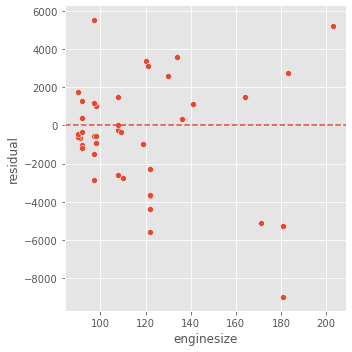

In [32]:
# Plot the residuals

g = sns.relplot(data = combined, x = 'enginesize', y= 'residual')

# draw a horizontal line where the y axis is 0 
for ax in g.axes.flat:
    ax.axhline(0, ls = '--')

# Review  Variables

In [4]:
df.nunique()

# fueltype, aspiration,doornumber,enginelocation are dichotomous variables. 
# These variables have just two values, 0 and 1 or 'front' and 'rear'

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [5]:
# review categorical variables

df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [6]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [7]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [8]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [9]:
# Review Nominal variables

df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [10]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [11]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [12]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [14]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

# Dummy Variables

In [24]:
# Create Dummy Variables

categoricalColumns = ['aspiration', 'doornumber', 'carbody', 'drivewheel', 'fueltype', 'enginetype', 'cylindernumber']
dummies = pd.get_dummies(df[categoricalColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   aspiration_std         205 non-null    uint8
 1   aspiration_turbo       205 non-null    uint8
 2   doornumber_four        205 non-null    uint8
 3   doornumber_two         205 non-null    uint8
 4   carbody_convertible    205 non-null    uint8
 5   carbody_hardtop        205 non-null    uint8
 6   carbody_hatchback      205 non-null    uint8
 7   carbody_sedan          205 non-null    uint8
 8   carbody_wagon          205 non-null    uint8
 9   drivewheel_4wd         205 non-null    uint8
 10  drivewheel_fwd         205 non-null    uint8
 11  drivewheel_rwd         205 non-null    uint8
 12  fueltype_diesel        205 non-null    uint8
 13  fueltype_gas           205 non-null    uint8
 14  enginetype_dohc        205 non-null    uint8
 15  enginetype_dohcv       205 non-null    u

In [25]:
# Combine the numeric data with dummy variables

# Replace the original categorical columns with the dummy columns

carsDummies = df.drop(columns = categoricalColumns)
carsDummies = carsDummies.join(dummies)
carsDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   car_ID                 205 non-null    int64  
 1   symboling              205 non-null    int64  
 2   CarName                205 non-null    object 
 3   enginelocation         205 non-null    object 
 4   wheelbase              205 non-null    float64
 5   carlength              205 non-null    float64
 6   carwidth               205 non-null    float64
 7   carheight              205 non-null    float64
 8   curbweight             205 non-null    int64  
 9   enginesize             205 non-null    int64  
 10  fuelsystem             205 non-null    object 
 11  boreratio              205 non-null    float64
 12  stroke                 205 non-null    float64
 13  compressionratio       205 non-null    float64
 14  horsepower             205 non-null    int64  
 15  peakrp

In [26]:
# Resclale the data and Check the correlations

# Step 1 : Rescale the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Created  an object from StandardSclaer() class and it named scaler. 
# It  stores the numeric columns in a list called numCols.
# This list doesn't include the dependent variable(price) or dummy columns because we dont want to resclae them.

numCols = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
           'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

carsDummies[numCols] = scaler.fit_transform(carsDummies[numCols])
carsDummies.head()

,car_ID,symboling,CarName,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,3,alfa-romero giulia,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,...,0,1,0,0,0,0,1,0,0,0
3,4,2,audi 100 ls,front,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,...,0,0,0,0,0,1,0,0,0,0
4,5,2,audi 100ls,front,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,...,0,0,0,0,1,0,0,0,0,0


In [27]:
# Check the Correlations in the Rescaled Data

carsDummies.corr()[['price']].sort_values(by = 'price', ascending = False)

,price
price,1.000000
enginesize,0.874145
curbweight,0.835305
horsepower,0.808139
carwidth,0.759325
carlength,0.682920
drivewheel_rwd,0.638957
wheelbase,0.577816
boreratio,0.553173
cylindernumber_eight,0.478614


In [ ]:
# Enginesize, curbweight, horsepower, carwidth are high correlated variables.